In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
def t_c(data): return(tf.constant(data,tf.float32))
def t_v(data): return(tf.Variable(data,tf.float32))
def t_n(t):    return(t.numpy().item())


X =  t_v(4.0)
with tf.GradientTape() as tape:
    Y = X **2

dY_dX = tape.gradient(Y,X)
t_n(dY_dX)

x1 =  t_v(1.0)
x2 =  t_v(2.0)
with tf.GradientTape() as tape:
    f = x1 ** 2 + x2 **2


In [3]:
df = pd.read_csv('data/cars.csv',index_col='Unnamed: 0')
df
    

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


In [4]:
x_data = df['speed'].values
y_data = df['dist'].values
x= t_c(x_data)
y= t_c(y_data)
w= t_v(tf.random.uniform([1]))
b= t_v(tf.random.uniform([1]))
print("x=",x)
print("y=",y)
print("w=",w)
print("b=",b)


x= tf.Tensor(
[ 4.  4.  7.  7.  8.  9. 10. 10. 10. 11. 11. 12. 12. 12. 12. 13. 13. 13.
 13. 14. 14. 14. 14. 15. 15. 15. 16. 16. 17. 17. 17. 18. 18. 18. 18. 19.
 19. 19. 20. 20. 20. 20. 20. 22. 23. 24. 24. 24. 24. 25.], shape=(50,), dtype=float32)
y= tf.Tensor(
[  2.  10.   4.  22.  16.  10.  18.  26.  34.  17.  28.  14.  20.  24.
  28.  26.  34.  34.  46.  26.  36.  60.  80.  20.  26.  54.  32.  40.
  32.  40.  50.  42.  56.  76.  84.  36.  46.  68.  32.  48.  52.  56.
  64.  66.  54.  70.  92.  93. 120.  85.], shape=(50,), dtype=float32)
w= <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.38457048], dtype=float32)>
b= <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3606032], dtype=float32)>


In [5]:
Adam = tf.keras.optimizers.Adam # SGD [ (+) Momentum ,  (+) {Adagrad, RMSProp} ] --> Adam 방향도 스텝도 자유자래로 
hist_cost = []
optimizer = Adam(learning_rate = 0.01)
for i in range(2000):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((w*x+b-y)**2)
    gradients = tape.gradient(cost, [w, b])
    optimizer.apply_gradients(zip(gradients, [w,b]) )
    # 미분초기화 ??
    # w.assign_sub(0.01*w미분)
    # b.assign_sub(0.01*b미분)
    c = t_n(cost)
    print("i = %4d, cost: %8.4f"%(i,c))
    hist_cost.append(c)
    if( t_n(cost) <1e-4): break

print("w= %8.4f, b=%8.4f"%(t_n(w),t_n(b)))


i =    0, cost: 1918.6290
i =    1, cost: 1904.6780
i =    2, cost: 1890.7878
i =    3, cost: 1876.9594
i =    4, cost: 1863.1937
i =    5, cost: 1849.4923
i =    6, cost: 1835.8553
i =    7, cost: 1822.2842
i =    8, cost: 1808.7800
i =    9, cost: 1795.3431
i =   10, cost: 1781.9745
i =   11, cost: 1768.6757
i =   12, cost: 1755.4465
i =   13, cost: 1742.2881
i =   14, cost: 1729.2014
i =   15, cost: 1716.1870
i =   16, cost: 1703.2454
i =   17, cost: 1690.3772
i =   18, cost: 1677.5831
i =   19, cost: 1664.8636
i =   20, cost: 1652.2194
i =   21, cost: 1639.6508
i =   22, cost: 1627.1581
i =   23, cost: 1614.7418
i =   24, cost: 1602.4025
i =   25, cost: 1590.1403
i =   26, cost: 1577.9553
i =   27, cost: 1565.8481
i =   28, cost: 1553.8188
i =   29, cost: 1541.8677
i =   30, cost: 1529.9946
i =   31, cost: 1518.2000
i =   32, cost: 1506.4839
i =   33, cost: 1494.8464
i =   34, cost: 1483.2875
i =   35, cost: 1471.8070
i =   36, cost: 1460.4055
i =   37, cost: 1449.0825
i =   38, co

(200.0, 509.3979187011719)

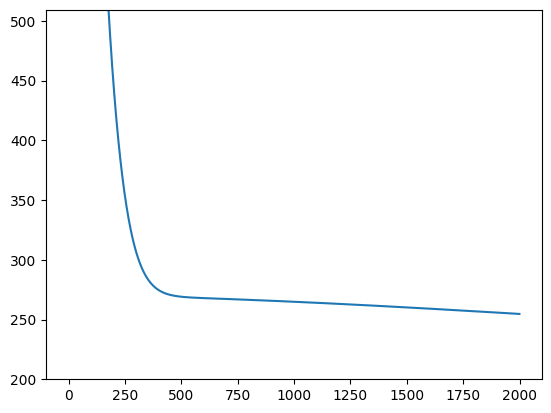

In [6]:
plt.plot(hist_cost)
plt.ylim([200, 2*c])

In [7]:
def predict_fn(x_data):
    return w*x_data+b


In [8]:
print(predict_fn(20))
print(predict_fn(24))

tf.Tensor([58.263237], shape=(1,), dtype=float32)
tf.Tensor([70.1664], shape=(1,), dtype=float32)


In [9]:
y_pred=predict_fn(x_data)

Text(0, 0.5, 'distance')

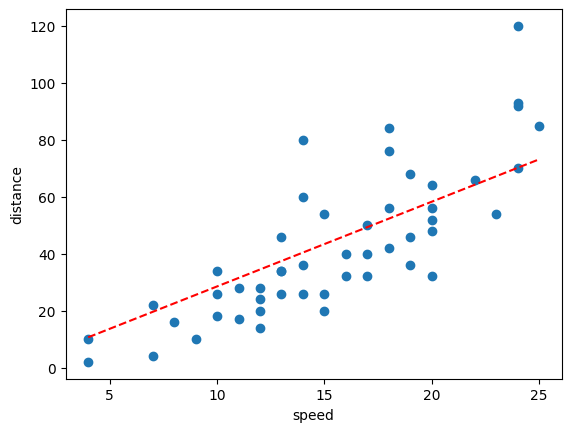

In [10]:
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred,'r--')
plt.xlabel("speed")
plt.ylabel("distance")